**Nama : Muammar Ahlan Abimanyu**  
**NIM : H071191032**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from matplotlib import pyplot as plt
import seaborn as sns

# Linear Regression

In [ ]:
import os 

os.environ['KAGGLE_USERNAME'] = "muammarahlanabimanyu"
os.environ['KAGGLE_KEY'] = "3f5cf8fd928b60f02edf019c951df36e"

!kaggle datasets download -d tanuprabhu/linear-regression-dataset

  0% 0.00/1.39k [00:00<?, ?B/s]
100% 1.39k/1.39k [00:00<00:00, 521kB/s]


In [ ]:
!unzip -q /content/linear-regression-dataset.zip

In [ ]:
df = pd.read_csv("/content/Linear Regression - Sheet1.csv")
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [ ]:
X = df["X"].values[:, np.newaxis]
y = df["Y"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept :" + str(lr.intercept_))
print("Coefficient :" + str(lr.coef_))

Intercept :5.888799701613237
Coefficient :[0.64004489]


In [ ]:
X_test_1 = [[2],[9]]

In [ ]:
predict_result = lr.predict(X_test_1)

In [ ]:
print(predict_result)

[ 7.16888948 11.64920371]


<function matplotlib.pyplot.show>

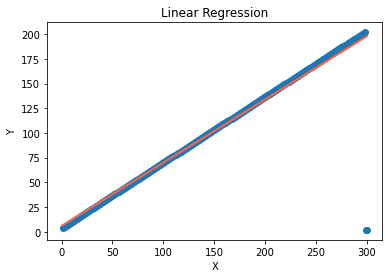

In [ ]:
predict_for_xtrain = lr.predict(X)

temporary_dataframe =  pd.DataFrame({
    'x': df["X"],
    'y': predict_for_xtrain
})

plt.scatter(df["X"], df["Y"])

plt.plot(temporary_dataframe['x'],temporary_dataframe['y'], color='tomato' ,linewidth = 2)

plt.xlabel("X")
plt.ylabel("Y")

plt.title("Linear Regression")

plt.show

# Logistic Regression

In [ ]:
import os 

os.environ['KAGGLE_USERNAME'] = "muammarahlanabimanyu"
os.environ['KAGGLE_KEY'] = "3f5cf8fd928b60f02edf019c951df36e"

!kaggle datasets download -d dragonheir/logistic-regression

  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 5.52MB/s]


In [ ]:
!unzip -q /content/logistic-regression.zip

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
gender_encoded = {"Gender": {"Male": 0, "Female": 1}}
df.replace(gender_encoded, inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [ ]:
df.drop("User ID", axis=1, inplace=True)

KeyError: ignored

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


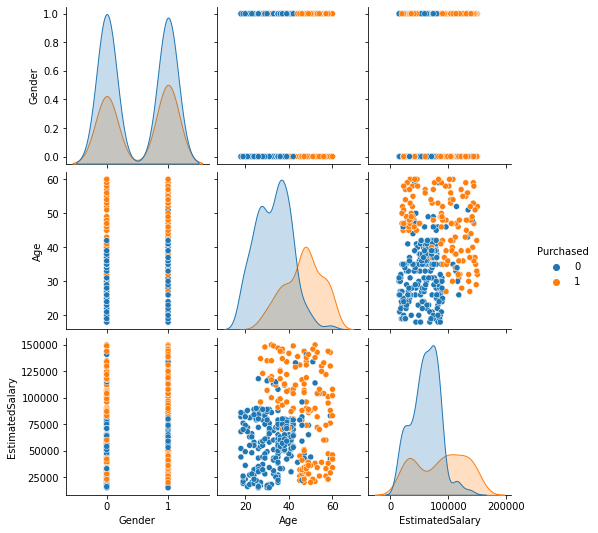

In [ ]:
sns.pairplot(df, hue="Purchased")

In [ ]:
X =  df.iloc[:, :-1]
y =  df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [ ]:
model_lrg = LogisticRegression()

model_lrg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(X_test)

     Gender  Age  EstimatedSalary
65        0   24            58000
81        0   39            42000
218       1   46            96000
214       0   47            43000
368       0   38            71000
..      ...  ...              ...
190       0   24            84000
233       0   49            86000
375       1   46            32000
178       0   24            23000
216       0   49            65000

[80 rows x 3 columns]


In [ ]:
X_test.reset_index(drop=True, inplace=True)

In [ ]:
prd = model_lrg.predict(X_test)

In [ ]:
prd_df = pd.DataFrame(prd)

In [ ]:
print(prd_df)

    0
0   0
1   0
2   0
3   0
4   0
.. ..
75  0
76  0
77  0
78  0
79  0

[80 rows x 1 columns]


In [ ]:
result = pd.concat([X_test, prd_df], axis = 1, ignore_index = True)

In [ ]:
result

,0,1,2,3
0,0,24,58000,0
1,0,39,42000,0
2,1,46,96000,0
3,0,47,43000,0
4,0,38,71000,0
...,...,...,...,...
75,0,24,84000,0
76,0,49,86000,0
77,1,46,32000,0
78,0,24,23000,0


In [ ]:
namaKolom = df.columns
result.columns = namaKolom
result

,Gender,Age,EstimatedSalary,Purchased
0,0,24,58000,0
1,0,39,42000,0
2,1,46,96000,0
3,0,47,43000,0
4,0,38,71000,0
...,...,...,...,...
75,0,24,84000,0
76,0,49,86000,0
77,1,46,32000,0
78,0,24,23000,0
